In [ ]:
!pip install git+https://github.com/Mayukhdeb/torch-dreams

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch_dreams.dreamer import dreamer
import torchvision.models as models
import torch

In [ ]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

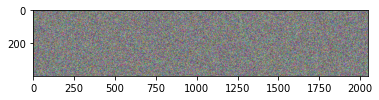

In [4]:
noise_size = (2048,400)
noise_long = (np.random.rand(256,1024,3).astype(np.float32) *255).astype(np.uint8)
noise_long = cv2.resize(noise_long,noise_size )
cv2.imwrite("noise_long.jpg", noise_long)
plt.imshow(noise_long)

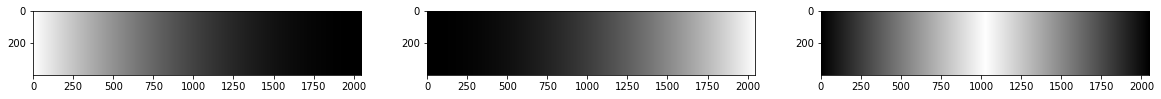

In [5]:
grad_mask =  cv2.rotate(np.repeat(np.linspace(0, 1, 512)**2,512*3).reshape(1024,256,3).astype(np.float32) ,cv2.ROTATE_90_CLOCKWISE)
grad_mask_2 =  cv2.rotate(np.repeat(np.linspace(1, 0, 512)**2,512*3).reshape(1024,256,3).astype(np.float32) ,cv2.ROTATE_90_CLOCKWISE)
grad_mask_3 =  1- np.abs(1- cv2.rotate(np.repeat(np.linspace(2, 0, 512),512*3).reshape(1024,256,3).astype(np.float32) ,cv2.ROTATE_90_CLOCKWISE))

grad_mask = cv2.resize(grad_mask, noise_size)
grad_mask_2 = cv2.resize(grad_mask_2, noise_size)
grad_mask_3 = cv2.resize(grad_mask_3, noise_size)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (20,5))

ax.flat[0].imshow(grad_mask)
ax.flat[1].imshow(grad_mask_2)
ax.flat[2].imshow(grad_mask_3)

In [ ]:
def custom_func(layer_outputs):
        loss = layer_outputs[1].norm()
        return loss
    
def custom_func_2(layer_outputs):
        loss = layer_outputs[0][7].norm()
        return loss

In [ ]:
config = {
    "image_path": "noise_long.jpg",
    "layers": [model.Mixed_6c.branch7x7_1.conv, model.Mixed_5d],
    "octave_scale": 1.1,
    "num_octaves": 14,
    "iterations": 14,
    "lr": 0.06,
    "custom_func": [custom_func, custom_func_2, None],
    "max_rotation": 0.2,
    "grayscale": False,
    "gradient_smoothing_coeff": 0.5,
    "gradient_smoothing_kernel_size": 9,
    "grad_mask":  [grad_mask, grad_mask_3, grad_mask_2]
}

In [6]:
out = dreamy_boi.deep_dream_with_masks(config)

100%|██████████| 15/15 [00:34<00:00,  2.29s/it]


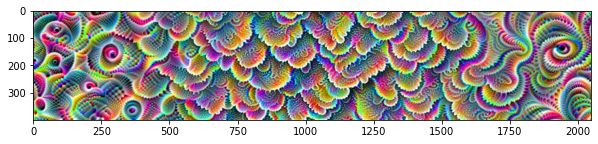

In [13]:
plt.rcParams['figure.figsize'] = 10,9
plt.imshow(out)

In [ ]:
cv2.imwrite("images/3_grad_masks.jpg",cv2.cvtColor(out_single_conv*255, cv2.COLOR_BGR2RGB))

True